In [1]:
import numpy as np
from PIL import Image
from keras.utils import to_categorical
import matplotlib.pyplot as plt 

In [2]:
import os
import cv2

x = []
y = []

classes = {'facemask': 0, 'no_facemask': 1}

folder_facemask = 'data/with_mask'
folder_no_mask = 'data/without_mask'

def image_to_array(folder, name):
  for img in os.listdir(folder):
    loaded_img = Image.open(os.path.join(folder, img))
    resized_img = Image.Image.resize(loaded_img, (224,224))
    img_array = np.array(resized_img)
    x.append(img_array)
    y.append(classes[name])

    img_blurred = cv2.blur(img_array, (2,2))
    x.append(img_blurred)
    y.append(classes[name])


image_to_array(folder_facemask, 'facemask')
image_to_array(folder_no_mask, 'no_facemask')


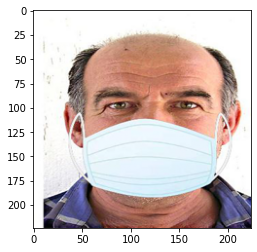

[1. 0.]
(224, 224, 3)


In [3]:
total = len(x)
i = 0
while i<total:
  if x[i].shape != (224,224,3):
    x.pop(i)
    y.pop(i)
    total -= 1
  else:
    i += 1

def view_image(index):
  plt.imshow(x[index])
  plt.show()
  print(y[index])
  print(x[index].shape)

y = to_categorical(y, num_classes=len(classes))
x = (np.array(x)/255)
view_image(500)

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Activation, BatchNormalization, Dropout, Flatten

model = Sequential()
model.add(Conv2D(128, (5,5), padding="same", activation='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, (5,5), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(rate=.5))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 128)     9728      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     409728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 401408)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               51380352  
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               5

Epoch 1/30
117/117 [==============================] - 11s 90ms/step - loss: 0.2448 - accuracy: 0.9079 - val_loss: 0.3109 - val_accuracy: 0.9140
Epoch 2/30
117/117 [==============================] - 10s 87ms/step - loss: 0.1131 - accuracy: 0.9602 - val_loss: 0.0747 - val_accuracy: 0.9742
Epoch 3/30
117/117 [==============================] - 10s 88ms/step - loss: 0.0793 - accuracy: 0.9736 - val_loss: 0.4776 - val_accuracy: 0.8731
Epoch 4/30
117/117 [==============================] - 10s 88ms/step - loss: 0.0662 - accuracy: 0.9774 - val_loss: 0.0933 - val_accuracy: 0.9634
Epoch 5/30
117/117 [==============================] - 10s 87ms/step - loss: 0.0558 - accuracy: 0.9795 - val_loss: 0.1042 - val_accuracy: 0.9656
Epoch 6/30
117/117 [==============================] - 10s 87ms/step - loss: 0.0463 - accuracy: 0.9822 - val_loss: 0.0554 - val_accuracy: 0.9849
Epoch 7/30
117/117 [==============================] - 10s 86ms/step - loss: 0.0443 - accuracy: 0.9849 - val_loss: 0.0508 - val_accuracy:

No handles with labels found to put in legend.


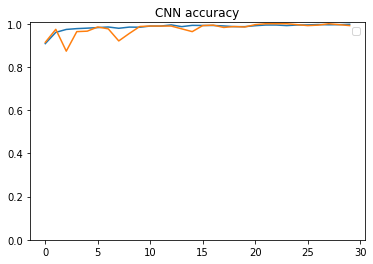

In [5]:
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)
optimizer = Adam(lr=.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
m = model.fit(x_train, y_train, batch_size = 16, epochs=30, validation_data=(x_test, y_test))
model.save('facemask.h5')

plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('CNN accuracy')
plt.ylim(bottom=0)
plt.legend(loc='upper right')


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[0] prediction
facemask


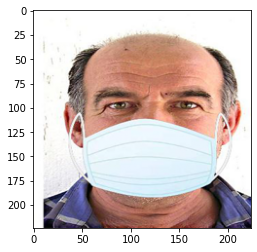

In [6]:
from keras.models import load_model

model = load_model('facemask.h5')

def prediction(index):
  img = x[index].reshape(1,224,224,3)
  prediction = model.predict_classes(img)
  print(prediction, 'prediction')
  if prediction == 1:
    print('no facemask')
  else:
    print('facemask')

  plt.imshow(x[index])
  plt.show()
prediction(500)
